## Roxana Aranda A01613911
# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/04SemanaTec/Herramientas computacionales/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [2]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Importing data

In [3]:
iris_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Cargar el dataset directamente desde la URL
df = pd.read_csv(iris_url, header=None)

# Definir los nombres de las columnas
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df.columns = attributes



# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values


In [12]:
df = df.dropna()
print(df.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [10]:
# Encoding the categorical column
df = df.replace({"species":{"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2}})
#Visualize the dataset
df


,sepal_length,sepal_width,petal_length,petal_width,species,kMean
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

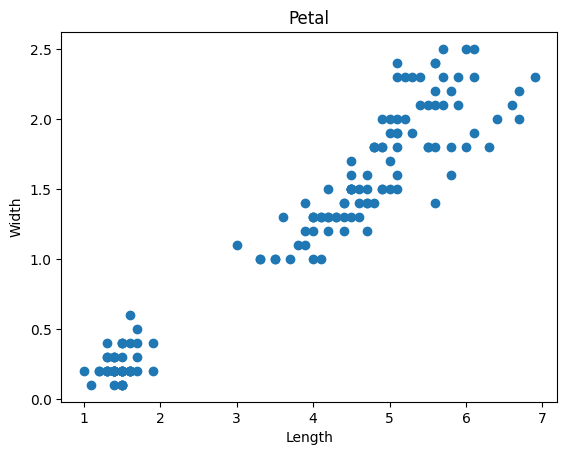

In [16]:
plt.scatter(x=df.petal_length, y=df.petal_width)
plt.ylabel("Width")
plt.xlabel("Length")
plt.title("Petal")
plt.show()

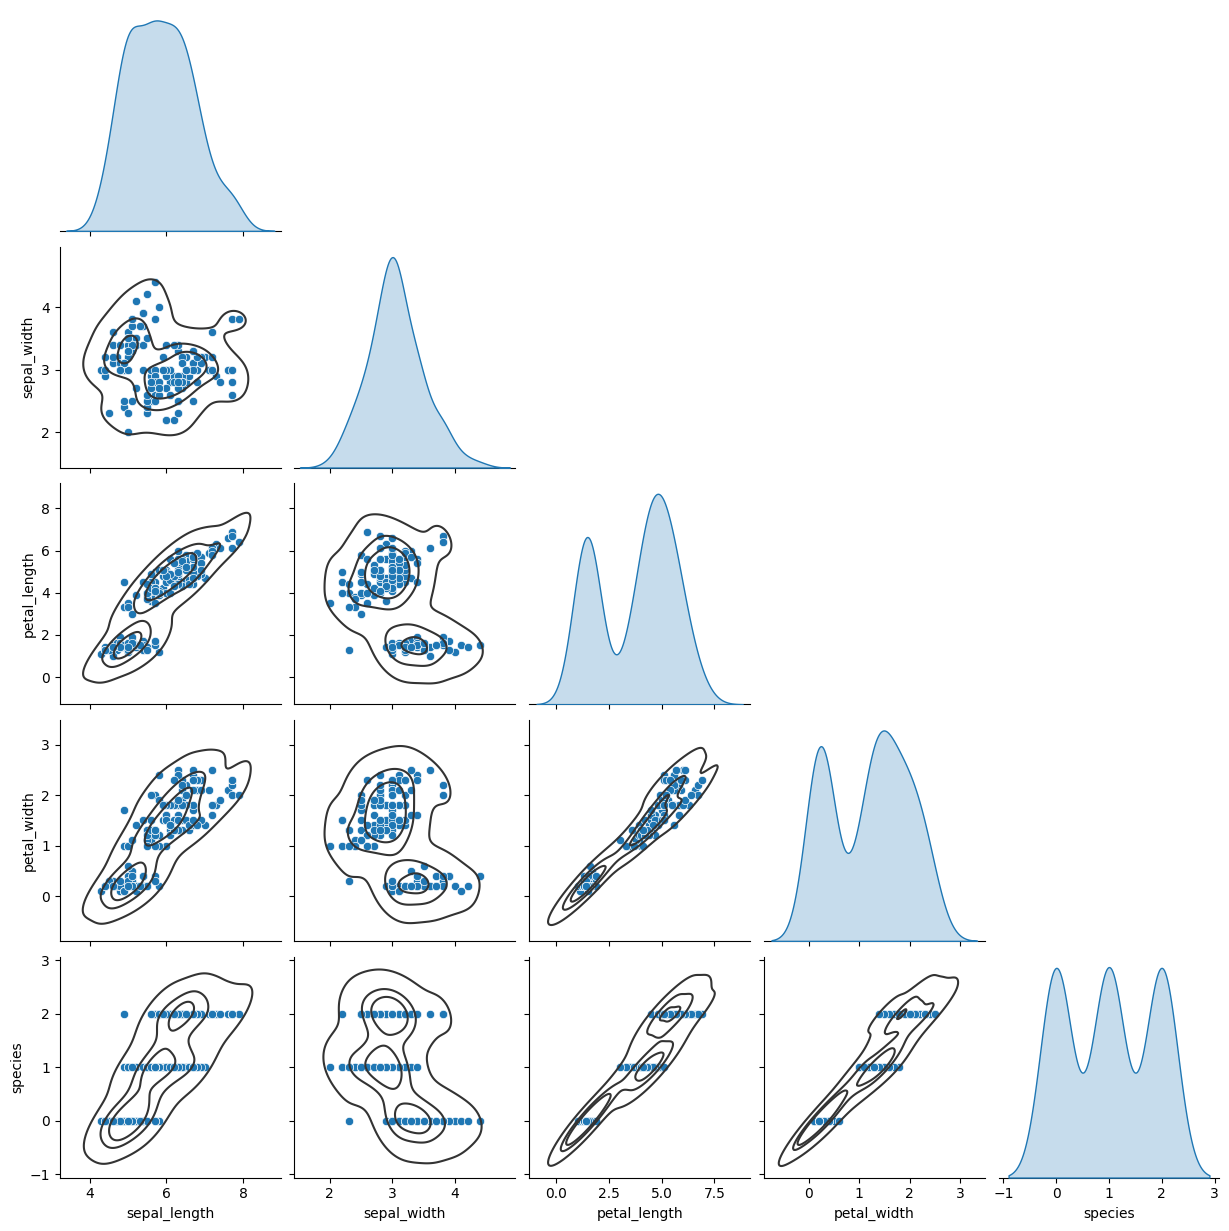

In [14]:
#Pairplot: scatterplot all variables
g = sns.pairplot(df, corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

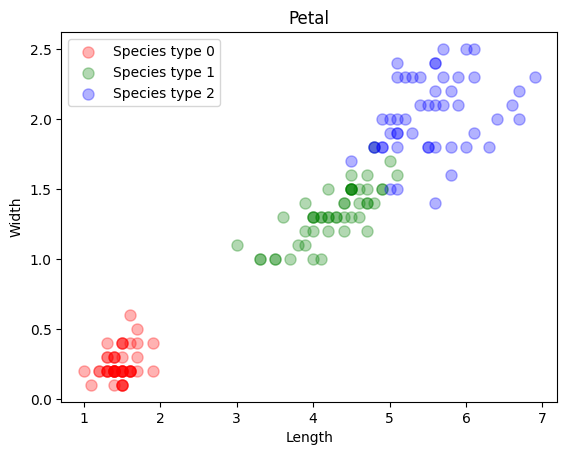

In [17]:
# Get dataframes for each real cluster
df1 = df[df.species == 0]
df2 = df[df.species == 1]
df3 = df[df.species == 2]

#Scatter plot of each real cluster
plt.scatter(df1.petal_length, df1.petal_width, label= 'Species type 0', c='r',marker='o',s=64, alpha=0.3)
plt.scatter(df2.petal_length, df2.petal_width, label= 'Species type 1', c='g',marker='o',s=64, alpha=0.3)
plt.scatter(df3.petal_length, df3.petal_width, label= 'Species type 2', c='b',marker='o',s=64, alpha=0.3)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

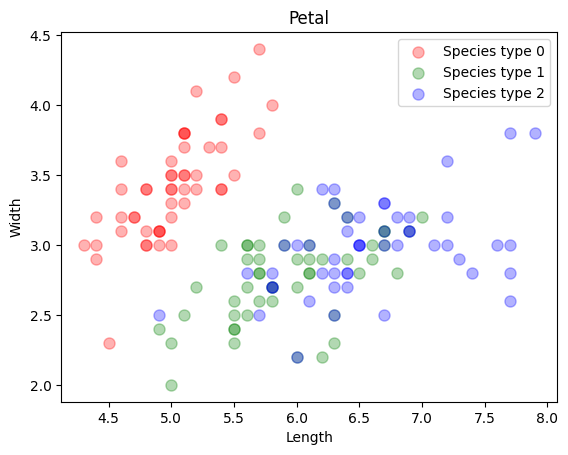

In [47]:
# Get dataframes for each real cluster
df1 = df[df.species == 0]
df2 = df[df.species == 1]
df3 = df[df.species == 2]

#Scatter plot of each real cluster
plt.scatter(df1.sepal_length, df1.sepal_width, label= 'Species type 0', c='r',marker='o',s=64, alpha=0.3)
plt.scatter(df2.sepal_length, df2.sepal_width, label= 'Species type 1', c='g',marker='o',s=64, alpha=0.3)
plt.scatter(df3.sepal_length, df3.sepal_width, label= 'Species type 2', c='b',marker='o',s=64, alpha=0.3)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [75]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# Define number of clusters
k=3
km = KMeans(n_clusters=k, n_init='auto', random_state=42)

# Do K-means clustering (assing each point in the dataset to a cluster)
km.fit_predict(X)

# Print estimated cluster of each point in the dataset
clusters = km.labels_
print("Cluster assignments:", clusters)

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [21]:
# Manual pairing the labels of the real and estimated clusters


In [57]:
# Add a new column to the dataset with the cluster information
df['kMean'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,kMean
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [58]:
# Laber of the estimated clusters
df['kMean'] = df['kMean'].replace({1: 0, 2: 1, 0: 2})

In [60]:
#Comprobación que funciono
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,kMean
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
149,5.9,3.0,5.1,1.8,2,1


In [12]:
# Cluster centroides
centroids = km.cluster_centers_
print("Cluster centroids:")
print(centroids)

Cluster centroids:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [17]:
# Sum of squared error (sse) of the final model
sse = km.inertia_
print(f"Sum of Squared Error (SSE): {sse:.2f}")

Sum of Squared Error (SSE): 78.95


In [18]:
# The number of iterations required to converge
iterations = km.n_iter_
print(f"Number of iterations required to converge: {iterations}")

Number of iterations required to converge: 6


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

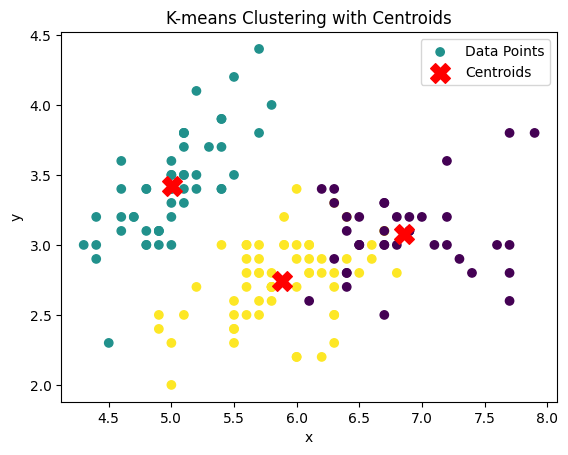

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', label='Data Points')

#Plot Centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')


plt.title('K-means Clustering with Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

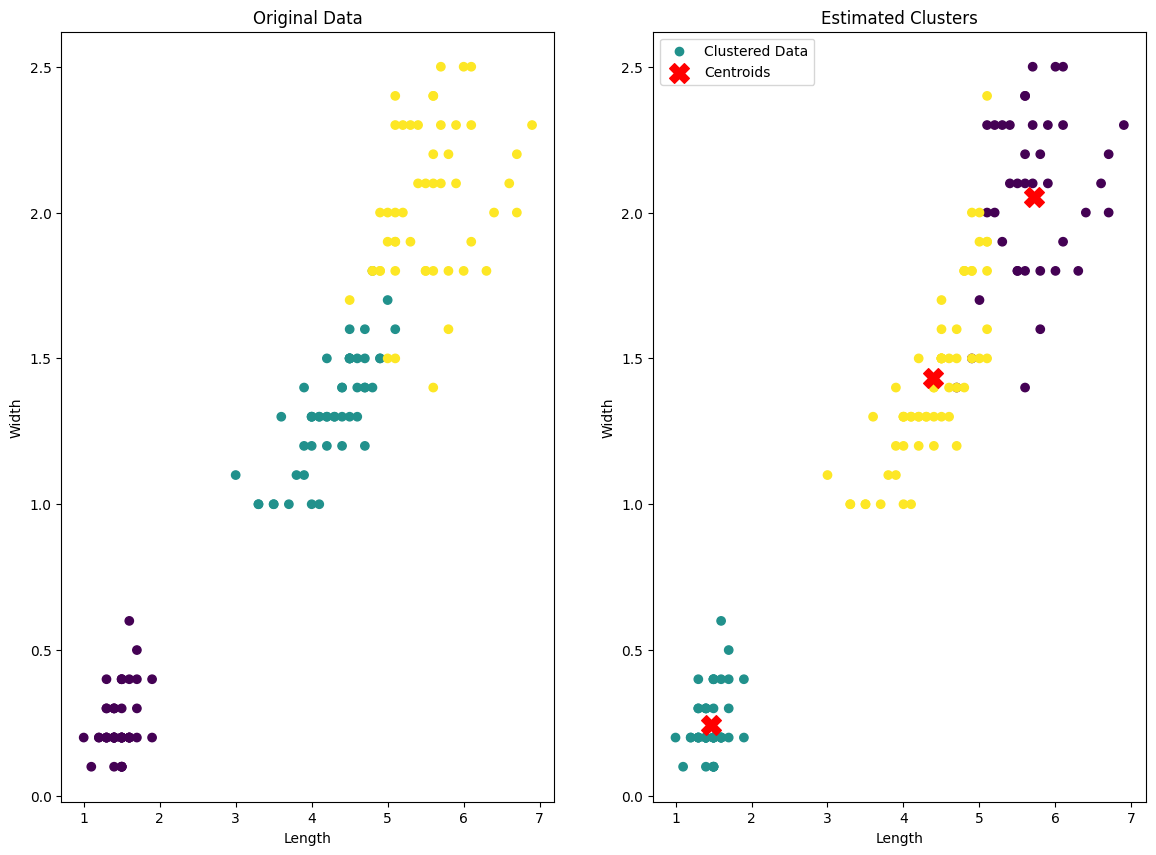

In [84]:
plt.figure(figsize=(14, 10))

#Plot original data
plt.subplot(1,2,1)

plt.scatter(X[:, 2], X[:, 3], c=df['species'], marker='o', label="Original data")

plt.title('Original Data')
plt.xlabel('Length')
plt.ylabel('Width')
#Plot the estimated clusters with color coding
plt.subplot(1,2,2)

plt.scatter(X[:, 2], X[:, 3], c=clusters, cmap='viridis', marker='o', label='Clustered Data')

plt.title('Estimated Clusters')
plt.xlabel('Length')
plt.ylabel('Width')

# Plot the centroids of the clusters
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', marker='X', s=200, label='Centroids')


plt.legend()
plt.show()


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [63]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k to test
k_values = range(1, 11)  # For example, test k from 1 to 10

# For each k
for k in k_values:
    # Initialize KMeans with the current k
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)

    # Fit the model
    km.fit(X)

    # Calculate the sum of squared errors (SSE)
    sse.append(km.inertia_)

# Print the SSE values for each k
for k, error in zip(k_values, sse):
    print(f'k={k}, SSE={error}')



k=1, SSE=680.8243999999996
k=2, SSE=152.36870647733915
k=3, SSE=78.94506582597728
k=4, SSE=57.44028021295475
k=5, SSE=46.535582051282034
k=6, SSE=39.251830892636775
k=7, SSE=35.04275995246584
k=8, SSE=30.217021122152712
k=9, SSE=28.7564561965812
k=10, SSE=28.424891802641817


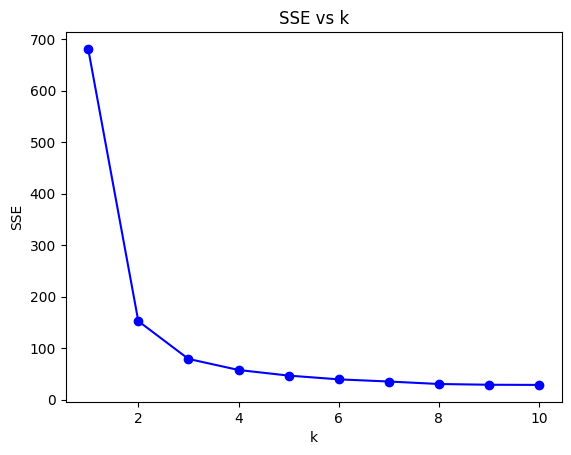

In [73]:
# Plot sse versus k
plt.plot(k_values,sse, c='blue', marker='o')

plt.title('SSE vs k')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



In [87]:
def KMC(df,k):
  X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
  print(k)
  # Define number of clusters
  km = KMeans(n_clusters=k, n_init='auto', random_state=42)

  # Do K-means clustering (assing each point in the dataset to a cluster)
  km.fit_predict(X)

  # Print estimated cluster of each point in the dataset
  clusters = km.labels_
  return clusters

2


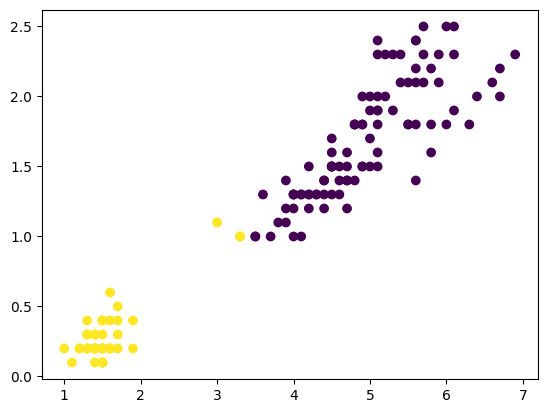

In [88]:
#k = 2
kNew= KMC(df,2)
plt.scatter(df.petal_length,df.petal_width, c=kNew)

4


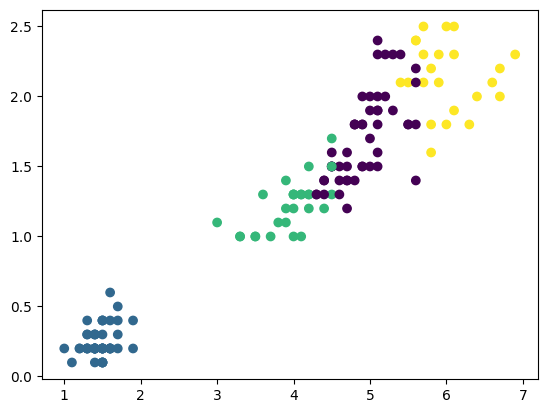

In [90]:
#k = 4
kNew= KMC(df,4)
plt.scatter(df.petal_length,df.petal_width, c=kNew)

5


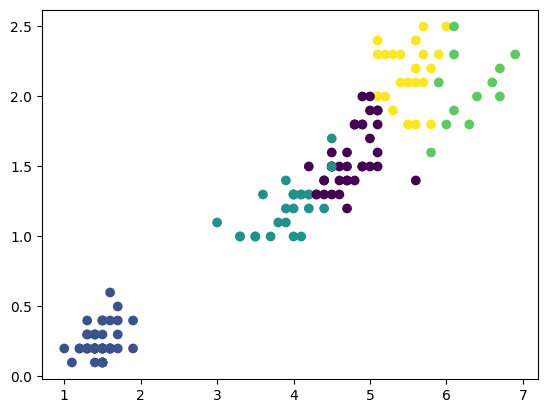

In [91]:
#k = 5
kNew = KMC(df,5)
plt.scatter(df.petal_length,df.petal_width, c=kNew)

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k